In [1]:
pip install opencv-python scikit-image pandas

In [ ]:
import cv2
import numpy as np
from skimage import measure
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the image
image_path = "nanofiber.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Preprocess the image
# Apply Gaussian Blur to smooth the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

In [ ]:
# Threshold the image to get a binary image
_, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV)

In [ ]:
# Detect edges using Canny edge detector
edges = cv2.Canny(binary, 50, 150)

In [ ]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Measure diameters
diameters = []
for contour in contours:
    if len(contour) > 5:  # Filter small contours
        ellipse = cv2.fitEllipse(contour)
        (major_axis, minor_axis) = ellipse[1]
        diameter = (major_axis + minor_axis) / 2
        diameters.append(diameter)

In [ ]:
# Calculate average diameter
average_diameter = np.mean(diameters) if diameters else 0

In [ ]:
# Output the results
print(f"Estimated fiber diameters: {diameters}")
print(f"Average fiber diameter: {average_diameter}")

Estimated fiber diameters: [16.17480969429016, 6.952279567718506, 20.83954906463623, 20.713501930236816, 26.92195463180542, 27.758976936340332, 33.349273681640625, 2.5606601238250732, 27.925204277038574, 7.881836414337158, 32.14633655548096, 71.97472381591797, 27.364086151123047, 12.956138134002686, 57.61170959472656, 162.53749099373817, 21.641245365142822, 33.833852767944336, 41.01683807373047, 16.442952156066895, 56.70528507232666, 37.336867332458496, 47.12784194946289, 156.75709915161133, 79.93609809875488, 41.03036880493164, 33.50513458251953, 24.61640691757202, 32.06601333618164, 93.02175903320312, 44.93117809295654, 25.73894214630127, 2.5606601238250732, 81.82604598999023, 48.33318328857422, 50.83226013183594, 17.04891061782837, 11.228973150253296, 41.2269926071167, 45.035194396972656, 77.81157684326172, 6.86007285118103, 50.375712394714355, 52.888139724731445, 82.44165802001953, 38.85428810119629, 115.13526153564453, 74.94652652740479, 43.03883361816406, 40.510786056518555, 4.24

In [ ]:
# Save diameters to a CSV file
df = pd.DataFrame(diameters, columns=['Diameter'])
csv_path = 'fiber_diameters.csv'
df.to_csv(csv_path, index=False)
print(f"Diameters saved to {csv_path}")

Diameters saved to fiber_diameters.csv


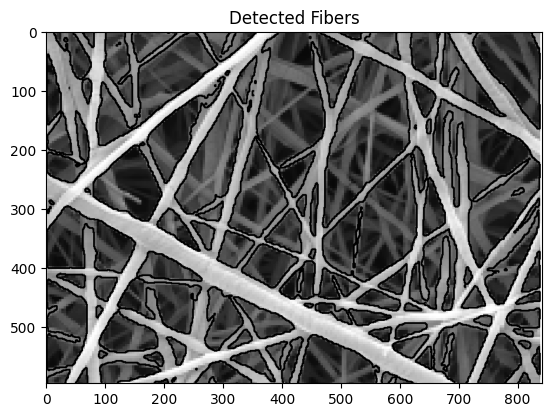

In [ ]:
# Optional: Display the image with detected fibers
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
plt.imshow(image, cmap='gray')
plt.title('Detected Fibers')
plt.show()

Text(0, 0.5, 'Frequency')

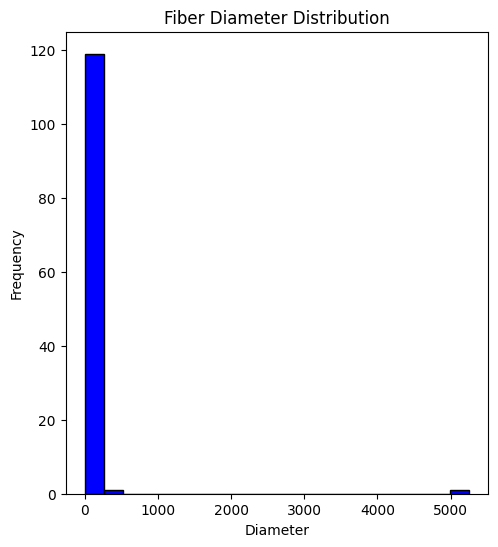

In [ ]:
# Plot histogram of diameters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(diameters, bins=20, color='blue', edgecolor='black')
plt.title('Fiber Diameter Distribution')
plt.xlabel('Diameter')
plt.ylabel('Frequency')

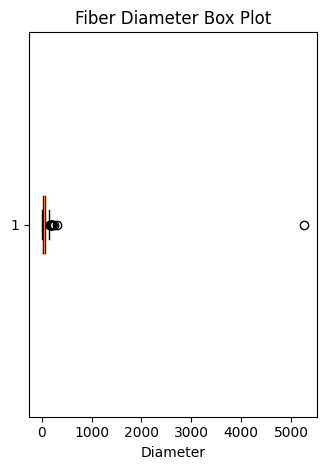

In [ ]:
# Plot box plot of diameters
plt.subplot(1, 2, 2)
plt.boxplot(diameters, vert=False)
plt.title('Fiber Diameter Box Plot')
plt.xlabel('Diameter')
plt.tight_layout()
plt.show()

In [ ]:
#filetring in the range 0 - 1000 nm
# Filter diameters for plotting between 0 and 1000
plot_diameters = [d for d in diameters if 0 <= d <= 1000]


Text(0, 0.5, 'Frequency')

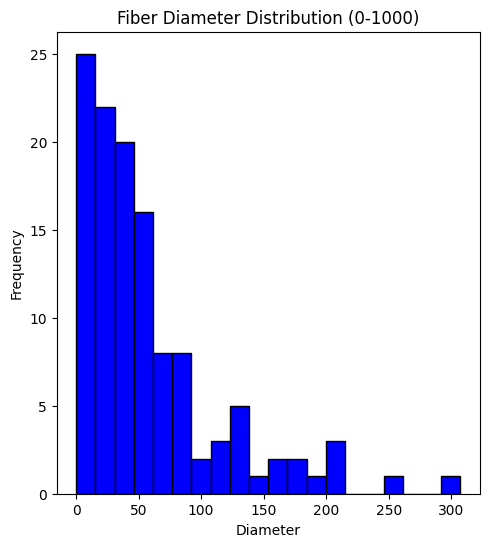

In [ ]:
# Plot histogram of filtered diameters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(plot_diameters, bins=20, color='blue', edgecolor='black')
plt.title('Fiber Diameter Distribution (0-1000)')
plt.xlabel('Diameter')
plt.ylabel('Frequency')

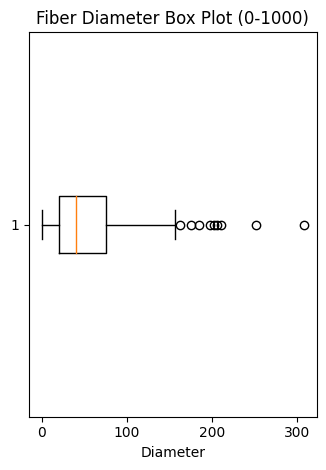

In [ ]:
# Plot box plot of filtered diameters
plt.subplot(1, 2, 2)
plt.boxplot(plot_diameters, vert=False)
plt.title('Fiber Diameter Box Plot (0-1000)')
plt.xlabel('Diameter')
plt.tight_layout()
plt.show()


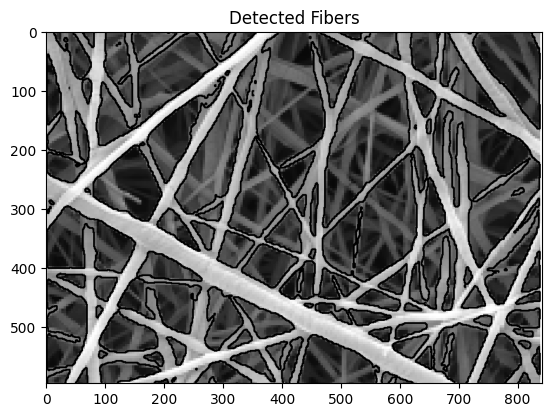

In [ ]:
# Optional: Display the image with detected fibers
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
plt.imshow(image, cmap='gray')
plt.title('Detected Fibers')
plt.show()

In [ ]:
import seaborn as sns  # Import seaborn
import scipy.stats as stats  # Import scipy for QQ plot

Text(0.5, 0, 'Diameter')

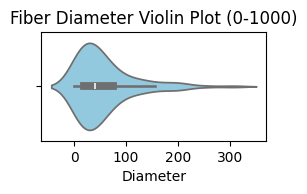

In [ ]:
# Plot violin plot of filtered diameters
plt.subplot(3, 2, 3)
sns.violinplot(data=plot_diameters, orient='h', color='skyblue')
plt.title('Fiber Diameter Violin Plot (0-1000)')
plt.xlabel('Diameter')

<ipython-input-23-737f962265d1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(plot_diameters, shade=True, color='green')


Text(0, 0.5, 'Density')

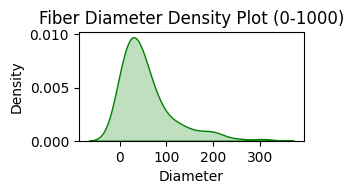

In [ ]:
# Plot density plot (KDE) of filtered diameters
plt.subplot(3, 2, 4)
sns.kdeplot(plot_diameters, shade=True, color='green')
plt.title('Fiber Diameter Density Plot (0-1000)')
plt.xlabel('Diameter')
plt.ylabel('Density')

Text(0, 0.5, 'Diameter')

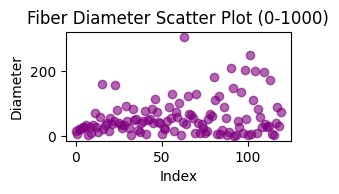

In [ ]:
# Plot scatter plot of filtered diameters
plt.subplot(3, 2, 5)
plt.scatter(range(len(plot_diameters)), plot_diameters, alpha=0.6, color='purple')
plt.title('Fiber Diameter Scatter Plot (0-1000)')
plt.xlabel('Index')
plt.ylabel('Diameter')

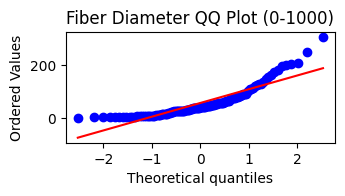

In [ ]:
# Plot QQ plot of filtered diameters
plt.subplot(3, 2, 6)
stats.probplot(plot_diameters, dist="norm", plot=plt)
plt.title('Fiber Diameter QQ Plot (0-1000)')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate percentages in each range
total_fibers = len(diameters)
range_0_300 = len([d for d in diameters if 0 <= d <= 300])
range_301_500 = len([d for d in diameters if 301 <= d <= 500])
range_501_1000 = len([d for d in diameters if 501 <= d <= 1000])
percentage_0_300 = (range_0_300 / total_fibers) * 100 if total_fibers else 0
percentage_301_500 = (range_301_500 / total_fibers) * 100 if total_fibers else 0
percentage_501_1000 = (range_501_1000 / total_fibers) * 100 if total_fibers else 0
print(f"Percentage of fibers in 0-300 nm: {percentage_0_300:.2f}%")
print(f"Percentage of fibers in 301-500 nm: {percentage_301_500:.2f}%")
print(f"Percentage of fibers in 501-1000 nm: {percentage_501_1000:.2f}%")

Percentage of fibers in 0-300 nm: 98.35%
Percentage of fibers in 301-500 nm: 0.83%
Percentage of fibers in 501-1000 nm: 0.00%
